## Capstone 2: Fraud Detection - EDA by Rehan Khan
##### Context
There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

##### Content
PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

* NOTE: Transactions which are detected as fraud are cancelled, so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) must not be used.

##### Headers
This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

##### Acknowledgements
This work is part of the research project ”Scalable resource-efficient systems for big data analytics” funded
by the Knowledge Foundation (grant: 20140032) in Sweden.

Please refer to this dataset using the following citations:

PaySim first paper of the simulator:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

## 1. Data Wrangling
#### Create Dataframe

In [1]:
#Import Packages 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning) 

In [ ]:
#Dataframe Creation With CSV
path = 'Data\Fraud_Data.csv'
df = pd.read_csv(path)

#### Data Exploration

In [3]:
#Print First 10 Rows
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
#Get Datatypes and Column Names of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#Print Out Number of Rows, Columns and Null Values
df_rows = df.shape[0]
df_columns = df.shape[1]
df_nulls = df.isnull().sum().sum()
print("This Fraud dataset contains {} rows, {} columns and {} null values throughout the dataset".format(df_rows, df_columns, df_nulls))

This Fraud dataset contains 6362620 rows, 11 columns and 0 null values throughout the dataset


In [6]:
#How Many Unique Customers Are in this Dataset?
num_customers = df['nameOrig'].nunique()
print("This fraud dataset contains information from {} customers using mobile money transfer".format(num_customers))

This fraud dataset contains information from 6353307 customers using mobile money transfer


In [7]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

#### Explore Types of Transactions in  Dataframes 

In [8]:
sns.countplot(df['type'])
df['type'].value_counts()

ValueError: could not convert string to float: 'PAYMENT'

#### Separate Fraud Data from Regular Data

In [9]:
#column of interest
col = df['isFraud']

#create variable 
df_fraud = df[col == 1]
df_notfraud = df[col== 0]

## 2. Exploratory Data Analysis

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

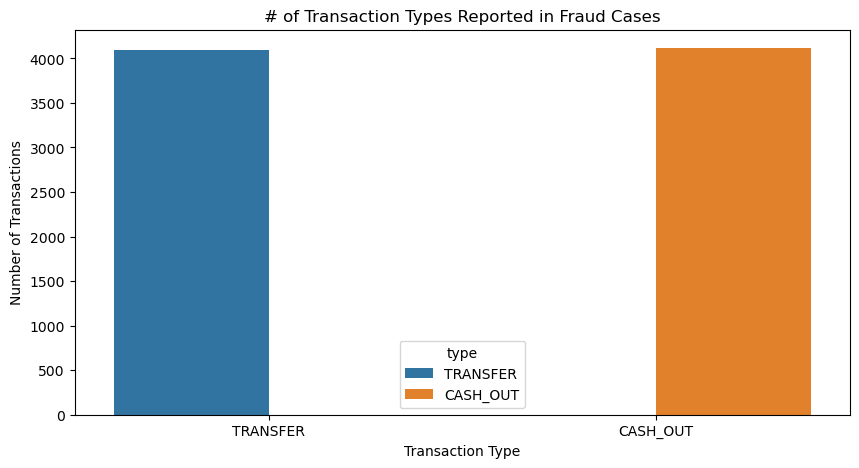

In [10]:
#Seaborn Figure for Transaction Types for Fraud Cases
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=df_fraud, hue='type')
plt.xlabel("Transaction Type")
plt.ylabel('Number of Transactions')
plt.title('# of Transaction Types Reported in Fraud Cases')
df_fraud.type.value_counts()

CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


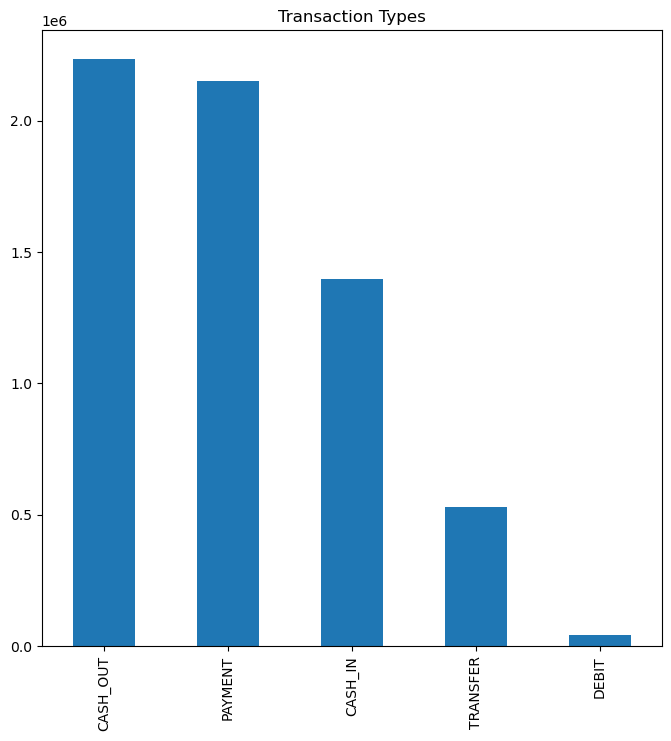

In [11]:
#Figure for Transaction Types for Non-Fraud Cases
print(df_notfraud.type.value_counts())
r, ax = plt.subplots(1, 1, figsize=(8, 8))
df_notfraud.type.value_counts().plot(kind='bar',title="Transaction Types", ax=ax, figsize=(8,8))
plt.show();

##### Transfers and Cashouts are almost equal in number in all of the fraud cases 

C:\Users\rehan\AppData\Local\Temp\ipykernel_11044\1797838450.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fraud.corr())
C:\Users\rehan\AppData\Local\Temp\ipykernel_11044\1797838450.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fraud.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.048320,0.063305,0.058487,0.018706,0.027891,NaN,0.034538
amount,0.048320,1.000000,0.858859,0.338561,-0.007037,0.299403,NaN,0.062365
oldbalanceOrg,0.063305,0.858859,1.000000,0.767811,-0.013187,0.185974,NaN,0.076819
newbalanceOrig,0.058487,0.338561,0.767811,1.000000,-0.015964,-0.032040,NaN,0.171402
oldbalanceDest,0.018706,-0.007037,-0.013187,-0.015964,1.000000,0.880353,NaN,-0.007207
newbalanceDest,0.027891,0.299403,0.185974,-0.032040,0.880353,1.000000,NaN,-0.014465
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFlaggedFraud,0.034538,0.062365,0.076819,0.171402,-0.007207,-0.014465,NaN,1.000000


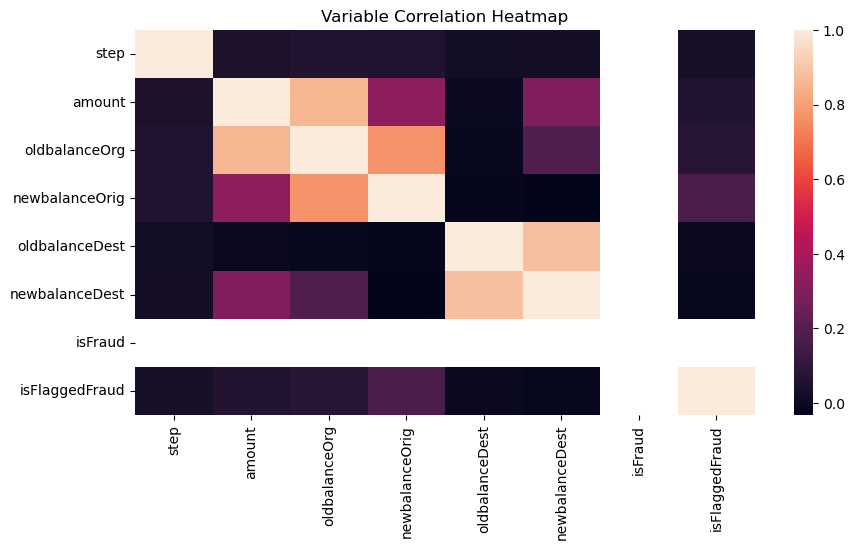

In [12]:
#heatmap of correlation within the transactions with fraud dataframe
plt.figure(figsize=(10,5))
plt.title('Variable Correlation Heatmap')
sns.heatmap(df_fraud.corr())
df_fraud.corr()

In [13]:
print('The total number of fraudulent transactions is {}.'.format(df.isFraud.sum()))
print('The total number of fraudulent transactions which is marked as fraud is {}.'.format(df.isFlaggedFraud.sum()))
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('The total amount lost due to these fraud transaction is ${}.'.format(int(df_fraud.amount.sum())))


The total number of fraudulent transactions is 8213.
The total number of fraudulent transactions which is marked as fraud is 16.
Thus in every 773 transaction there is 1 fraud transaction happening.
The total amount lost due to these fraud transaction is $12056415427.


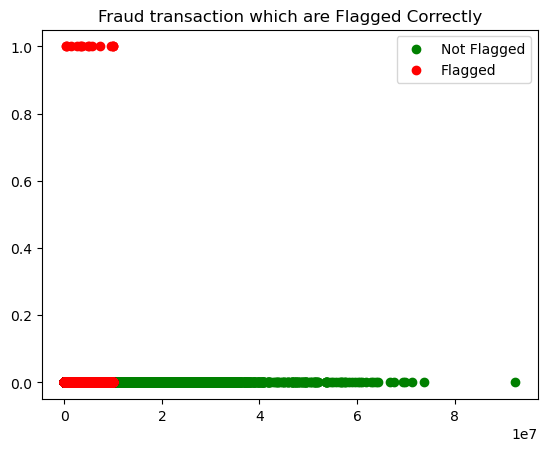

In [14]:
z = plt.figure()
axes = z.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(df_notfraud['amount'],df_notfraud['isFlaggedFraud'],c='g')
axes.scatter(df_fraud['amount'],df_fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

#### Plot above shows that the fraud detection mechanism is not properly detecting fraud cases and we must do a deeper dive to figure out why